# HW 5-1

## Boston Housing Prices: Regression


## Summary

The data in the table below summarizes the training, and testing mean absolute error (MAE) at the optimal number of epochs for the 6 models. Below these tables the code can be found along with training/validation MAE and plots for each model.

 Model |number of layers |units per layer |Batch size | optimal number of epochs | training MAE | testing MAE 
:---:|:---:|:---:|:---:|:---:|:---:|:---:
Model 1| 1 | 64 | 16| 150 | 1.770| 2.714
Model 2| 3 | 64 | 16 | 175 | 0.984| 2.320
Model 3| 2 | 32 | 16| 150 | 1.705| 2.841
Model 4| 2 | 128 | 16 | 90 | 1.643| 2.910
Model 5| 2 | 64 | 8| 50 | 1.838| 2.894
Model 6| 2 | 64 | 32| 150 | 1.591| 2.923



**Import the relevant libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


**Import the boston housing price dataset and pre process data (normalize)**

In [38]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Models and testing

In [3]:
def build_model_one_layer():
    model = keras.Sequential([layers.Dense(64, activation="relu"),
                              layers.Dense(1) ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

def build_model_three_layers():
    model = keras.Sequential([layers.Dense(64, activation="relu"),
                              layers.Dense(64, activation="relu"),
                              layers.Dense(64, activation="relu"),
                              layers.Dense(1) ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

def build_model_32_units():
    model = keras.Sequential([layers.Dense(32, activation="relu"),
                              layers.Dense(32, activation="relu"),
                              layers.Dense(1) ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

def build_model_128_units():
    model = keras.Sequential([layers.Dense(128, activation="relu"),
                              layers.Dense(128, activation="relu"),
                              layers.Dense(1) ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

def build_model():
    model = keras.Sequential([layers.Dense(64, activation="relu"),
                              layers.Dense(64, activation="relu"),
                              layers.Dense(1) ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


### 4-fold cross validation

In [7]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500

**one intermediate layer**

In [9]:
all_mae_histories_one_layer = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] 
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples] 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model_one_layer()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) 
    mae_history = history.history["val_mae"]
    all_mae_histories_one_layer.append(mae_history)

Processing fold #0


2022-03-14 15:18:47.335831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:18:47.588331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-03-14 15:19:31.770033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:19:32.018733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-03-14 15:20:15.939660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:20:16.199624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-03-14 15:21:01.374335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:21:01.566227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


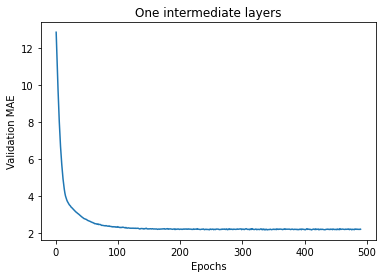

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories_one_layer]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] ## Remove first 10 values 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.title("One intermediate layers")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The optimal number of Epochs appears to be about 150.

In [41]:
opt_num_epochs = 150
model = build_model_one_layer()
model.fit(train_data,
          train_targets,
          epochs=opt_num_epochs,# Use 150 epochs
          batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mse_score, train_mae_score = model.evaluate(train_data, train_targets)
print(f"Testing MAE: {test_mae_score}")
print(f"Training MAE: {train_mae_score}")

2022-03-14 16:37:03.369795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 5ms/step - loss: 6.6033 - mae: 1.7697
Testing MAE: 2.7145745754241943
Training MAE: 1.7697166204452515


2022-03-14 16:37:17.792207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


**Three intermediate layers**

In [10]:
all_mae_histories_three_layers = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] 
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples] 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model_three_layers()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) 
    mae_history = history.history["val_mae"]
    all_mae_histories_three_layers.append(mae_history)

Processing fold #0


2022-03-14 15:21:45.453135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:21:45.984582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-03-14 15:22:42.000889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:22:42.377699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-03-14 15:23:37.320589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:23:37.707373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-03-14 15:24:32.873298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:24:33.235239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


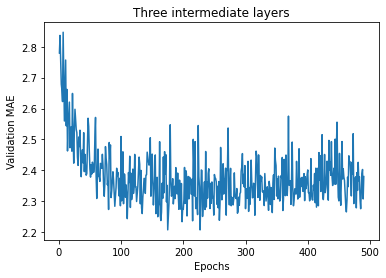

In [39]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories_three_layers]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] ## Remove first 10 values 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.title("Three intermediate layers")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The optimal number of Epochs appears to be about 175.

In [40]:
opt_num_epochs = 175
model = build_model_three_layers()
model.fit(train_data,
          train_targets,
          epochs=opt_num_epochs,# Use 175 epochs
          batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mse_score, train_mae_score = model.evaluate(train_data, train_targets)
print(f"Testing MAE: {test_mae_score}")
print(f"Training MAE: {train_mae_score}")

2022-03-14 16:36:41.077052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 4ms/step - loss: 1.8605 - mae: 0.9839
Testing MAE: 2.3197944164276123
Training MAE: 0.9838833212852478


2022-03-14 16:37:03.090549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


**32 units**

In [11]:
all_mae_histories_32_units= []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] 
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples] 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model_32_units()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) 
    mae_history = history.history["val_mae"]
    all_mae_histories_32_units.append(mae_history)

Processing fold #0


2022-03-14 15:25:28.428167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:25:28.869772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-03-14 15:26:17.910871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:26:18.284187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-03-14 15:27:07.153381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:27:07.527350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-03-14 15:27:56.510906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:27:56.894134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


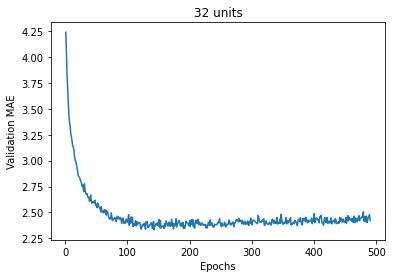

In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories_32_units]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] ## Remove first 10 values 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.title("32 units")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The optimal number of Epochs appears to be about 150.

In [42]:
opt_num_epochs = 150
model = build_model_32_units()
model.fit(train_data,
          train_targets,
          epochs=opt_num_epochs,# Use 150 epochs
          batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mse_score, train_mae_score = model.evaluate(train_data, train_targets)
print(f"Testing MAE: {test_mae_score}")
print(f"Training MAE: {train_mae_score}")

2022-03-14 16:37:18.113664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 4ms/step - loss: 5.6024 - mae: 1.7049
Testing MAE: 2.8407540321350098
Training MAE: 1.7048572301864624


2022-03-14 16:37:34.308898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


**128 units**

In [12]:
all_mae_histories_128_units= []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] 
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples] 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model_128_units()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) 
    mae_history = history.history["val_mae"]
    all_mae_histories_128_units.append(mae_history)

Processing fold #0


2022-03-14 15:28:46.517135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:28:46.915553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-03-14 15:29:36.314415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:29:36.641250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-03-14 15:30:25.961902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:30:26.295467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-03-14 15:31:15.385570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:31:15.736457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


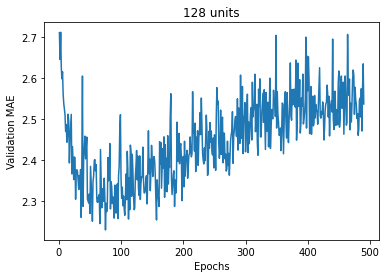

In [22]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories_128_units]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] ## Remove first 10 values 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.title("128 units")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The optimal number of Epochs appears to be about 90.

In [45]:
opt_num_epochs = 90
model = build_model_128_units()
model.fit(train_data,
          train_targets,
          epochs=opt_num_epochs,# Use 90 epochs
          batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mse_score, train_mae_score = model.evaluate(train_data, train_targets)
print(f"Testing MAE: {test_mae_score}")
print(f"Training MAE: {train_mae_score}")

2022-03-14 16:39:53.030064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 5ms/step - loss: 4.9779 - mae: 1.6433
Testing MAE: 2.909583806991577
Training MAE: 1.6433337926864624


2022-03-14 16:40:03.226873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


**Batch size of 8**

In [13]:
all_mae_histories_batch_size_8= []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] 
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples] 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=8, # Batch size is 8
                        verbose=0) 
    mae_history = history.history["val_mae"]
    all_mae_histories_batch_size_8.append(mae_history)

Processing fold #0


2022-03-14 15:32:04.990655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:32:05.922885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-03-14 15:33:36.975755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:33:37.413007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-03-14 15:35:07.469361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:35:07.919450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-03-14 15:36:38.181831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:36:38.673433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


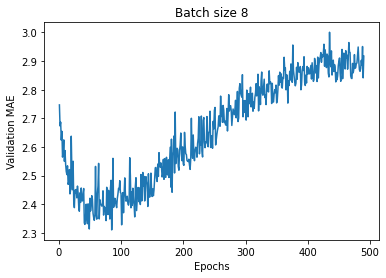

In [24]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories_batch_size_8]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] ## Remove first 10 values 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.title("Batch size 8")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The optimal number of Epochs appears to be about 50.

In [43]:
opt_num_epochs = 50
model = build_model()
model.fit(train_data,
          train_targets,
          epochs=opt_num_epochs,# Use 50 epochs
          batch_size=8, #Use batch size 8
          verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mse_score, train_mae_score = model.evaluate(train_data, train_targets)
print(f"Testing MAE: {test_mae_score}")
print(f"Training MAE: {train_mae_score}")

2022-03-14 16:37:34.582511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 4ms/step - loss: 6.5678 - mae: 1.8376
Testing MAE: 2.893740177154541
Training MAE: 1.837634801864624


2022-03-14 16:37:44.952772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


**Batch size of 32**

In [14]:
all_mae_histories_batch_size_32= []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] 
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples] 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=32, # Batch size is 32
                        verbose=0) 
    mae_history = history.history["val_mae"]
    all_mae_histories_batch_size_32.append(mae_history)

Processing fold #0


2022-03-14 15:38:08.861515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:38:09.224370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-03-14 15:38:38.843397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:38:39.083411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-03-14 15:39:07.784265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:39:08.042028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-03-14 15:39:36.895397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-14 15:39:37.165568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


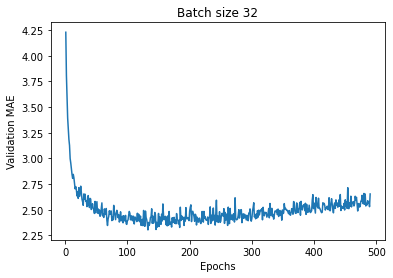

In [25]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories_batch_size_32]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] ## Remove first 10 values 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.title("Batch size 32")
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The optimal number of epochs appears to be 150.

In [44]:
opt_num_epochs = 150
model = build_model()
model.fit(train_data,
          train_targets,
          epochs=opt_num_epochs,# Use 150 epochs
          batch_size=32, #Use batch size 32
          verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
train_mse_score, train_mae_score = model.evaluate(train_data, train_targets)

print(f"Testing MAE: {test_mae_score}")
print(f"Training MAE: {train_mae_score}")

2022-03-14 16:37:45.242833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 5ms/step - loss: 4.7838 - mae: 1.5907
Testing MAE: 2.9225854873657227
Training MAE: 1.5906789302825928


2022-03-14 16:37:54.050101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
